In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plty

The following code blocks helps to import the csv files saved

In [2]:
#X
X_lp5 = pd.read_csv("Data_files\X\X_lp5.csv").dropna()

In [3]:
#Y
Y_lp5 = pd.read_csv("Data_files\Y\Y_lp5.csv")

The next step is to find the corelation.
A benchmark of 80 percent is kept in order to eliminate corelated variables since the dataset is small

In [4]:
X_lp5.corr(method = 'pearson')

,Fx_lp5,Fy_lp5,Fz_lp5,Tx_lp5,Ty_lp5,Tz_lp5
Fx_lp5,1.000000,0.076592,-0.042929,0.306486,-0.063062,0.279654
Fy_lp5,0.076592,1.000000,0.582030,-0.046219,0.026881,0.195701
Fz_lp5,-0.042929,0.582030,1.000000,-0.230975,0.135385,0.043144
Tx_lp5,0.306486,-0.046219,-0.230975,1.000000,0.094246,0.204614
Ty_lp5,-0.063062,0.026881,0.135385,0.094246,1.000000,-0.170569
Tz_lp5,0.279654,0.195701,0.043144,0.204614,-0.170569,1.000000


Since there is no corelation among variables in the datset, other analysis can be done

Adding 2 more rows of resultant force and torque using the formula.
F= √(F_X^2+F_Y^2+ F_Z^2 ) and similarly for T

In [5]:
X_lp5["F_lp5"] = (X_lp5['Fx_lp5']**2 + X_lp5['Fy_lp5']**2 + X_lp5["Fz_lp5"]**2)**0.5
X_lp5["T_lp5"] = (X_lp5["Tx_lp5"]**2 + X_lp5["Ty_lp5"]**2 + X_lp5["Tz_lp5"]**2)**0.5

Applying Min-Max normalization for all the attributes

In [6]:
X_lp5 = (X_lp5 - X_lp5.min())/(X_lp5.max() - X_lp5.min())

In [7]:
X_lp5.head()

,Fx_lp5,Fy_lp5,Fz_lp5,Tx_lp5,Ty_lp5,Tz_lp5,F_lp5,T_lp5
0,0.655019,0.464634,0.916481,0.447826,0.486158,0.504065,0.022004,0.003648
1,0.655019,0.464634,0.915985,0.447826,0.486833,0.504065,0.021454,0.002736
2,0.655019,0.464634,0.915985,0.447826,0.486833,0.504065,0.021454,0.002736
3,0.655019,0.464634,0.916233,0.447826,0.486833,0.504065,0.021729,0.002736
4,0.654275,0.464634,0.915985,0.448370,0.486158,0.506098,0.021463,0.003827


PCA on the resultant values

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_lp5[["F_lp5", "T_lp5"]])
print(pca.explained_variance_ratio_)

[0.88085862 0.11914138]


<AxesSubplot:>

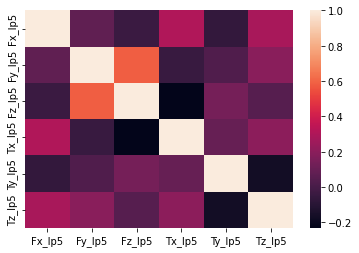

In [9]:
sns.heatmap(X_lp5[["Fx_lp5", "Fy_lp5", "Fz_lp5", "Tx_lp5", "Ty_lp5", "Tz_lp5"]].corr())

Converting the DF to numpy so as to convert it into 3d arrays and compute the average and overall force torque values
Followed by reshaping it into 3d numpy arrays

In [10]:
X_lp5_numpy = X_lp5.to_numpy()
X_lp5_numpy = X_lp5_numpy.reshape(-1,15,8)

In [11]:
print(X_lp5_numpy.shape)
print(X_lp5_numpy)

(164, 15, 8)
[[[6.55018587e-01 4.64634146e-01 9.16480793e-01 ... 5.04065041e-01
   2.20039576e-02 3.64770446e-03]
  [6.55018587e-01 4.64634146e-01 9.15985130e-01 ... 5.04065041e-01
   2.14542854e-02 2.73577835e-03]
  [6.55018587e-01 4.64634146e-01 9.15985130e-01 ... 5.04065041e-01
   2.14542854e-02 2.73577835e-03]
  ...
  [6.55018587e-01 4.64634146e-01 9.15737299e-01 ... 5.04065041e-01
   2.11794535e-02 3.64770446e-03]
  [6.54275093e-01 4.64634146e-01 9.16232962e-01 ... 5.06097561e-01
   2.17377071e-02 2.95704873e-03]
  [6.55018587e-01 4.64634146e-01 9.15985130e-01 ... 5.04065041e-01
   2.14542854e-02 2.73577835e-03]]

 [[6.60966543e-01 4.64634146e-01 9.15985130e-01 ... 4.97967480e-01
   2.15098768e-02 3.99894631e-03]
  [6.87732342e-01 4.62195122e-01 9.16232962e-01 ... 5.10162602e-01
   2.45812187e-02 4.77117828e-02]
  [6.52788104e-01 4.70731707e-01 9.14745973e-01 ... 5.02032520e-01
   2.01468941e-02 1.55533286e-02]
  ...
  [6.55762082e-01 4.59756098e-01 9.16232962e-01 ... 5.04065041e-

Taking the mean of all the 15 readings for all the 8 columns

In [12]:
X_lp5_avg = np.mean(X_lp5_numpy, axis=1)

Converting to dataframes for better visualisation

In [13]:
X_lp5_dfprime = pd.DataFrame(X_lp5_avg, columns=["Fx_lp5", "Fy_lp5", "Fz_lp5", "Tx_lp5", "Ty_lp5", "Tz_lp5", "F_lp5", "T_lp5"])

Combining X and Y 

In [14]:
X_lp5_df = pd.concat([X_lp5_dfprime, Y_lp5], axis = 1)

X_lp5_df = 

In [15]:
print(X_lp5_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fx_lp5  164 non-null    float64
 1   Fy_lp5  164 non-null    float64
 2   Fz_lp5  164 non-null    float64
 3   Tx_lp5  164 non-null    float64
 4   Ty_lp5  164 non-null    float64
 5   Tz_lp5  164 non-null    float64
 6   F_lp5   164 non-null    float64
 7   T_lp5   164 non-null    float64
 8   Y_lp5   164 non-null    float64
dtypes: float64(9)
memory usage: 11.7 KB
None


In [16]:
print(X_lp5_df.describe())

           Fx_lp5      Fy_lp5      Fz_lp5      Tx_lp5      Ty_lp5      Tz_lp5  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000   
mean     0.656566    0.457781    0.873563    0.448484    0.486105    0.497259   
std      0.026381    0.038636    0.089228    0.019491    0.027771    0.022549   
min      0.540570    0.152602    0.288790    0.372899    0.314607    0.360705   
25%      0.653185    0.461118    0.890673    0.442627    0.477853    0.491023   
50%      0.654994    0.464797    0.898397    0.447844    0.485933    0.498509   
75%      0.658538    0.467805    0.915820    0.450290    0.493045    0.504505   
max      0.784734    0.564553    0.921652    0.590145    0.629214    0.642547   

            F_lp5       T_lp5       Y_lp5  
count  164.000000  164.000000  164.000000  
mean     0.042889    0.038716    1.908537  
std      0.094862    0.048546    1.468750  
min      0.001782    0.003021    0.000000  
25%      0.004837    0.009541    0.000000  
50%   

Now is that all the data are checked for null values (no null values present), now data is visualised using various tools

1. Scatter Plot (done on both decimal and log scale)

lp5

In [17]:
dic = {"Fx_lp5": "red", "Fy_lp5": "blue" , "Fz_lp5": "green" , "Tx_lp5": "black", "Tx_lp5": "purple", "Ty_lp5": "orange", "Tz_lp5": "yellow"}
lp5_scatter = plty.scatter(X_lp5_df, x = ["Fx_lp5", "Fy_lp5", "Fz_lp5", "Tx_lp5", "Ty_lp5", "Tz_lp5"],  color_discrete_map= dic)
lp5_logscatter = plty.scatter(X_lp5_df,  x = ["Fx_lp5", "Fy_lp5", "Fz_lp5", "Tx_lp5", "Ty_lp5", "Tz_lp5"] , y= "Y_lp5", log_x=True)
lp5_scatter.show()
lp5_logscatter.show()

Kernel density estimation plot

<AxesSubplot:xlabel='F_lp5', ylabel='Density'>

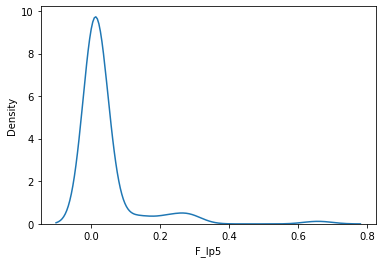

In [18]:
sns.kdeplot(data=X_lp5_df, x = 'F_lp5', bw_method = "scott" , bw_adjust = 1)

<AxesSubplot:xlabel='T_lp5', ylabel='Density'>

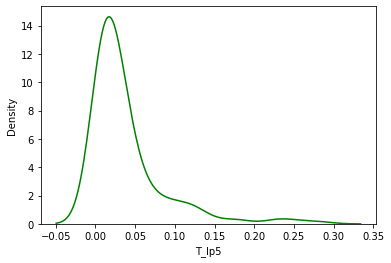

In [19]:
sns.kdeplot(data=X_lp5_df, x = 'T_lp5', color="Green")

In [20]:
plty.scatter(X_lp5_df, x = "F_lp5", y = "T_lp5", color="Y_lp5", log_x=True, log_y=True)

Boxplot

In [21]:
plty.box(X_lp5_df, x = ["F_lp5", "T_lp5"])

Refining the cluster and plotting scatter and box plots without outliers

In [22]:
#X_lp5_df = X_lp5_df.drop(X_lp5_df[((X_lp5_df.F_lp5 < 0.09) & (X_lp5_df.Y_lp5==1))].index)
# X_lp5_df.loc[X_lp5_df["T_lp5"] > 0.093, "T_lp5"] = 0.092
# X_lp5_df.loc[X_lp5_df["F_lp5"] > 0.0455, "F_lp5"] = 0.0454

In [23]:
plty.scatter(X_lp5_df, x = "F_lp5", y = "T_lp5", color="Y_lp5", log_x=True, log_y=True)

In [24]:
plty.scatter(X_lp5_df, x = ["Fx_lp5", "Fy_lp5", "Fz_lp5", "Tx_lp5", "Ty_lp5", "Tz_lp5"],   color_discrete_map= dic)

In [25]:
plty.scatter(X_lp5_df, x = ["Fx_lp5", "Fy_lp5", "Fz_lp5", "Tx_lp5", "Ty_lp5", "Tz_lp5"],   color= "Y_lp5")

Boxplot

In [26]:
plty.box(X_lp5_df, x = ["F_lp5", "T_lp5"])

To know the class distribution

In [27]:
np.unique(Y_lp5.to_numpy(), return_counts=True)

(array([0., 1., 2., 3., 4.]), array([44, 26, 21, 47, 26], dtype=int64))

Training the dataset

Splitting test and train set in the ratio of 70:30

In [28]:
from sklearn.model_selection import train_test_split

lp5_train, lp5_test = train_test_split(X_lp5_df, test_size=0.3, random_state=2)


1. Decision Tree

In [29]:
print("Training using Decision Tree...")
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
acc = pd.DataFrame(columns={"Model": [], "Train": [], "Dev": [], "Test":[], "Precision Score": [], "Recall Score": [], "F1 Score": [] })
X = lp5_train[["F_lp5", "T_lp5" ]]
Y = lp5_train["Y_lp5"]
lp5_model = tree.DecisionTreeClassifier(criterion="log_loss", max_depth=6, max_features=5, max_leaf_nodes=5)
treemodel = cross_validate(lp5_model, X, Y, cv=5,return_train_score=True)
lp5_model.fit(X, Y)

Training using Decision Tree...


DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features=5,
                       max_leaf_nodes=5)

Results

In [30]:
print("++++++Decision Tree++++++")
print("+++Train Results+++\nParametes: \n",lp5_model.get_params())
train_pred = lp5_model.predict(lp5_train[["F_lp5", "T_lp5"]])
accuracy_scr1 = treemodel['train_score'].mean()
print("\nTrain Score", treemodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", treemodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("\n+++Test Results+++\nParametes: \n",lp5_model.get_params())
test_pred = lp5_model.predict(lp5_test[["F_lp5", "T_lp5"]])
#print("\nPrediction of test set:", test_pred)
accuracy_scr2 = accuracy_score(lp5_test["Y_lp5"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp5_test["Y_lp5"], test_pred, labels=[0,1,2,3,4])
print("\nConfusion Matrix:\n",confMat)
prec_tree = precision_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_tree)
Rec_tree = recall_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_tree)
f1_tree = f1_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_tree)
acc.loc[len(acc.index)] = ['Decision Tree', accuracy_scr1, treemodel['test_score'].mean(), accuracy_scr2, prec_tree.mean(), Rec_tree.mean(), f1_tree.mean()] 

++++++Decision Tree++++++
+++Train Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 6, 'max_features': 5, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Train Score 0.686383182035356
_____________________________________________________________________________________
Validation Score 0.6316205533596837
_____________________________________________________________________________________

+++Test Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 6, 'max_features': 5, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Test accuracy score 0.56

Confusion Matrix:
 [[11  0  0  1  0]
 [ 0  0  2  7  0]
 [ 0  0  5  1  0]
 [ 2  0  0 12  0]
 [ 

In [31]:
#lp5_model.predict_proba(lp5_test[["F_lp5", "T_lp5"]])

Printing the tree

[Text(0.5, 0.9, 'X[0] <= 0.043\nlog_loss = 2.236\nsamples = 114\nvalue = [32, 17, 15, 33, 17]'),
 Text(0.3333333333333333, 0.7, 'X[1] <= 0.007\nlog_loss = 1.959\nsamples = 96\nvalue = [32, 13, 1, 33, 17]'),
 Text(0.16666666666666666, 0.5, 'log_loss = 0.866\nsamples = 25\nvalue = [20, 4, 0, 1, 0]'),
 Text(0.5, 0.5, 'X[0] <= 0.021\nlog_loss = 1.91\nsamples = 71\nvalue = [12, 9, 1, 32, 17]'),
 Text(0.3333333333333333, 0.3, 'log_loss = 1.361\nsamples = 38\nvalue = [0, 7, 0, 23, 8]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 0.022\nlog_loss = 1.951\nsamples = 33\nvalue = [12, 2, 1, 9, 9]'),
 Text(0.5, 0.1, 'log_loss = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0, 0]'),
 Text(0.8333333333333334, 0.1, 'log_loss = 1.58\nsamples = 21\nvalue = [0, 2, 1, 9, 9]'),
 Text(0.6666666666666666, 0.7, 'log_loss = 0.764\nsamples = 18\nvalue = [0, 4, 14, 0, 0]')]

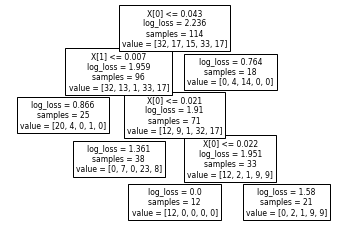

In [32]:
tree.plot_tree(lp5_model)

Exporting the model to txt file

In [33]:
# from sklearn.tree import export_text
# lp5export_tree = export_text(lp5_model) 
# with open('lp5exportree.txt', 'w') as f:
#     f.writelines(lp5export_tree)

2. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
lp5_forest = RandomForestClassifier(criterion="log_loss", max_depth=3, max_features=5, max_leaf_nodes=5)
X = lp5_train[["F_lp5", "T_lp5"]]
Y = lp5_train["Y_lp5"]
forestmodel = cross_validate(lp5_forest, X, Y, cv=3,return_train_score=True)
lp5_forest.fit(X, Y)

RandomForestClassifier(criterion='log_loss', max_depth=3, max_features=5,
                       max_leaf_nodes=5)

In [35]:
print("++++++Random Forest++++++")
print("+++Train Results+++\nParametes: \n",lp5_forest.get_params())
train_pred = lp5_forest.predict(lp5_train[["F_lp5", "T_lp5"]])
accuracy_scr1 = forestmodel['train_score'].mean()
print("\nTrain Score", forestmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", forestmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp5_forest.get_params())
test_pred = lp5_forest.predict(lp5_test[["F_lp5", "T_lp5"]])
#print("\nPrediction of test set:", test_pred)
accuracy_scr2 = accuracy_score(lp5_test["Y_lp5"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp5_test["Y_lp5"], test_pred, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_forest = precision_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_forest)
Rec_forest = recall_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_forest)
f1_forest = f1_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_forest)
acc.loc[len(acc.index)] = ['Random Forest', accuracy_scr1, forestmodel['test_score'].mean(), accuracy_scr2, prec_forest.mean(), Rec_forest.mean(), f1_forest.mean()] 

++++++Random Forest++++++
+++Train Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 5, 'max_leaf_nodes': 5, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Score 0.7192982456140351
_____________________________________________________________________________________
Validation Score 0.6228070175438596
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 3, 'max_features': 5, 'max_leaf_nodes': 5, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimato

3. Support Vector Machines

In [36]:
from sklearn import svm
X = lp5_train[["F_lp5", "T_lp5" ]]
Y = lp5_train["Y_lp5"]
lp5_SVM_Model = svm.SVC(kernel='rbf', C=2.9)
svmmodel = cross_validate(lp5_SVM_Model, X, Y, cv=3,return_train_score=True)
lp5_SVM_Model.fit(X, Y)

SVC(C=2.9)

In [37]:
print("++++++Support Vector Machines++++++")
print("+++Train Results+++\nParametes: \n",lp5_SVM_Model.get_params())
train_pred = lp5_SVM_Model.predict(lp5_train[["F_lp5", "T_lp5"]])
accuracy_scr1 = svmmodel['train_score'].mean()
print("\nTrain Score", svmmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", svmmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp5_SVM_Model.get_params())
X_test = lp5_test[["F_lp5", "T_lp5" ]]
Y_test = lp5_test["Y_lp5"]
test_pred = lp5_SVM_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("\nTest Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp5_test["Y_lp5"], test_pred, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_SVM = precision_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_SVM)
Rec_SVM = recall_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_SVM)
f1_SVM = f1_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_SVM)
acc.loc[len(acc.index)] = ['SVM', accuracy_scr1, svmmodel['test_score'].mean(), accuracy_scr2,prec_SVM.mean(), Rec_SVM.mean(), f1_SVM.mean()] 

++++++Support Vector Machines++++++
+++Train Results+++
Parametes: 
 {'C': 2.9, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Train Score 0.5350877192982456
_____________________________________________________________________________________
Validation Score 0.5263157894736842
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'C': 2.9, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Test Accuracy 0.44
Confusion Matrix:
 [[12  0  0  0  0]
 [ 6  0  0  3  0]
 [ 1  0  5  0  0]
 [ 9  

4. Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
X = lp5_train[["F_lp5", "T_lp5" ]]
Y = lp5_train["Y_lp5"]
lp5_GNB_Model = GaussianNB()
gnbmodel = cross_validate(lp5_GNB_Model, X, Y, cv=3,return_train_score=True)
lp5_GNB_Model.fit(X, Y)

GaussianNB()

In [39]:
print("++++++Gaussian Naive Bayes++++++")
print("+++Train Results+++\nParametes: \n",lp5_GNB_Model.get_params())
train_pred = lp5_GNB_Model.predict(lp5_train[["F_lp5", "T_lp5"]])
accuracy_scr1 = gnbmodel['train_score'].mean()
print("\nTrain Score", gnbmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", gnbmodel['test_score'].mean())
print("_____________________________________________________________________________________")
X_test = lp5_test[["F_lp5", "T_lp5" ]]
Y_test = lp5_test["Y_lp5"]
test_pred = lp5_GNB_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("Test Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp5_test["Y_lp5"], test_pred, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_GNB = precision_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_GNB)
Rec_GNB = recall_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_GNB)
f1_GNB = f1_score(lp5_test["Y_lp5"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_GNB)
acc.loc[len(acc.index)] = ['Gaussian Naive Bayes', accuracy_scr1, gnbmodel['test_score'].mean(), accuracy_scr2, prec_GNB.mean(), Rec_GNB.mean(), f1_GNB.mean()] 

++++++Gaussian Naive Bayes++++++
+++Train Results+++
Parametes: 
 {'priors': None, 'var_smoothing': 1e-09}

Train Score 0.49122807017543857
_____________________________________________________________________________________
Validation Score 0.47368421052631576
_____________________________________________________________________________________
Test Accuracy 0.54
Confusion Matrix:
 [[12  0  0  0  0]
 [ 4  4  0  0  1]
 [ 1  0  5  0  0]
 [ 9  0  0  5  0]
 [ 3  0  0  5  1]]

Precision Score: [0.4137931 1.        1.        0.5       0.5      ]
Recall Score: [1.         0.44444444 0.83333333 0.35714286 0.11111111]
F1 Score: [0.58536585 0.61538462 0.90909091 0.41666667 0.18181818]


5. Shallow Neural Networks

Splitting the data as test validation (dev) and train set using stratified shuffling with 4 n splits

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
lp5_train = sss.split(X_lp5_df[["F_lp5", "T_lp5" ]], X_lp5_df["Y_lp5"])
for train,test in sss.split(X_lp5_df[["F_lp5", "T_lp5" ]], X_lp5_df["Y_lp5"]):
    X = X_lp5_df[["F_lp5", "T_lp5" ]].iloc[train]
    Y = X_lp5_df["Y_lp5"].iloc[train]
    X_dt = X_lp5_df[["F_lp5", "T_lp5" ]].iloc[test]
    Y_dt = X_lp5_df["Y_lp5"].iloc[test]
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
for train,test in sss.split(X_dt, Y_dt):
    xd = X_dt.iloc[train]
    yd = Y_dt.iloc[train]
    X_test = X_dt.iloc[test]
    Y_test = Y_dt.iloc[test]
# lp5_train, lp5_Devtest = train_test_split(X_lp5_df, test_size=0.3, random_state=2)
# lp5_dev, lp5_test = train_test_split(lp5_Devtest, test_size=0.5, random_state=2)
# print(xd.value_counts())  
# print(yd.value_counts())
# print(X_test.value_counts())  
# print(Y_test.value_counts())

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf   #For reproducability
tf.random.set_seed(2)
lp5_SNN_model = tf.keras.Sequential()
lp5_SNN_model.add(Dense(2, activation='LeakyReLU', input_shape = (2,)))
lp5_SNN_model.add(Dense(100, activation='LeakyReLU'))
# lp5_SNN_model.add(Dropout(0.2))
lp5_SNN_model.add(Dense(30, activation='LeakyReLU'))
# lp5_SNN_model.add(Dense(84, activation='LeakyReLU'))
# lp5_SNN_model.add(Dense(84, activation='LeakyReLU'))
# lp5_SNN_model.add(Dense(30, activation='LeakyReLU'))
lp5_SNN_model.add(Dense(14, activation='LeakyReLU'))
lp5_SNN_model.add(Dense(5, activation='softmax'))

In [42]:
#opti = keras.optimizers.experimental.SGD(learning_rate=0.01)
opti = keras.optimizers.Adam(learning_rate=0.005)
lp5_SNN_model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
history = lp5_SNN_model.fit(X, Y, batch_size=8, epochs=95, validation_data = (xd, yd))

Epoch 1/95
15/15 [==============================] - 1s 21ms/step - loss: 1.5930 - accuracy: 0.2544 - val_loss: 1.5611 - val_accuracy: 0.2800
Epoch 2/95
15/15 [==============================] - 0s 4ms/step - loss: 1.5476 - accuracy: 0.2895 - val_loss: 1.5004 - val_accuracy: 0.3200
Epoch 3/95
15/15 [==============================] - 0s 4ms/step - loss: 1.4912 - accuracy: 0.3509 - val_loss: 1.4460 - val_accuracy: 0.4000
Epoch 4/95
15/15 [==============================] - 0s 4ms/step - loss: 1.3502 - accuracy: 0.4211 - val_loss: 1.3321 - val_accuracy: 0.4400
Epoch 5/95
15/15 [==============================] - 0s 4ms/step - loss: 1.2393 - accuracy: 0.4298 - val_loss: 1.3440 - val_accuracy: 0.4000
Epoch 6/95
15/15 [==============================] - 0s 4ms/step - loss: 1.2835 - accuracy: 0.4649 - val_loss: 1.4754 - val_accuracy: 0.3600
Epoch 7/95
15/15 [==============================] - 0s 4ms/step - loss: 1.3371 - accuracy: 0.3158 - val_loss: 1.3320 - val_accuracy: 0.3600
Epoch 8/95
15/15 [=

Plotting loss vs epoch

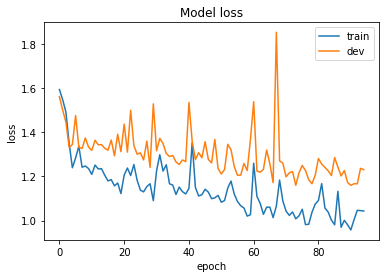

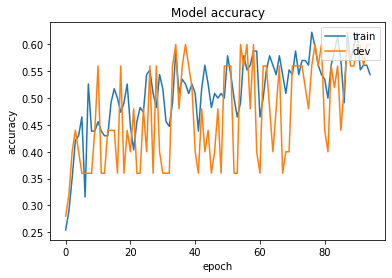

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [44]:
lp5_SNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 14)                434       
                                                                 
 dense_4 (Dense)             (None, 5)                 75        
                                                                 
Total params: 3,845
Trainable params: 3,845
Non-trainable params: 0
_________________________________________________________________


In [45]:
pred = lp5_SNN_model.predict(X_test)
# #print(pred*100)
pred_class = np.argmax(pred, axis=1)
# #print(pred_class)
# acc_score_SNN = accuracy_score(Y_test, pred_class)
# print(acc_score_SNN)
confMat = confusion_matrix(Y_test, pred_class, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_SNN = precision_score(Y_test, pred_class, average=None, zero_division=0)
print("\nPrecision Score:",prec_SNN)
Rec_SNN = recall_score(Y_test, pred_class, average=None, zero_division=0)
print("Recall Score:",Rec_SNN)
f1_SNN = f1_score(Y_test, pred_class, average=None, zero_division=0)
print("F1 Score:",f1_SNN)

1/1 [==============================] - 0s 95ms/step
Confusion Matrix:
 [[5 0 0 2 0]
 [0 3 1 0 0]
 [0 0 3 0 0]
 [0 0 0 7 0]
 [0 0 0 4 0]]

Precision Score: [1.         1.         0.75       0.53846154 0.        ]
Recall Score: [0.71428571 0.75       1.         1.         0.        ]
F1 Score: [0.83333333 0.85714286 0.85714286 0.7        0.        ]


In [46]:
print(lp5_SNN_model.metrics_names)
test_accuracy = lp5_SNN_model.evaluate(X_test, Y_test)
print(test_accuracy)

['loss', 'accuracy']
1/1 [==============================] - 0s 27ms/step - loss: 0.7865 - accuracy: 0.7200
[0.786479115486145, 0.7200000286102295]


In [47]:
acc.loc[len(acc.index)] = ['ANN', ((history.history['accuracy'][-1])),((history.history['val_accuracy'][-1])), test_accuracy[1], prec_SNN.mean(), Rec_SNN.mean(), f1_SNN.mean()] 

Exporting the model and weights

In [48]:
lp5_SNN_model.save('exports/lp5_SNN_Export')
lp5_SNN_model.save_weights('exports/lp5_SNNWeights_Export')

INFO:tensorflow:Assets written to: exports/lp5_SNN_Export\assets


INFO:tensorflow:Assets written to: exports/lp5_SNN_Export\assets


Overall parameters

In [49]:
acc

,Model,Train,Dev,Test,Precision Score,Recall Score,F1 Score
0,Decision Tree,0.686383,0.631621,0.56,0.392088,0.521429,0.438937
1,Random Forest,0.719298,0.622807,0.58,0.609649,0.553968,0.514647
2,SVM,0.535088,0.526316,0.44,0.348848,0.438095,0.364875
3,Gaussian Naive Bayes,0.491228,0.473684,0.54,0.682759,0.549206,0.541665
4,ANN,0.543860,0.600000,0.72,0.657692,0.692857,0.649524
